### CLIP OPENAI

https://huggingface.co/openai/clip-vit-base-patch32

In [3]:
import os
import sys
import uuid
import cv2

import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

from config.path import get_training_data_path
from src.utils.augmentation import erase_generator
from src.pipeline.modules.clip import ClipClassifier
from PIL import Image, ImageDraw
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

/home/kohnle/master-projekt/dataset/classifier/train/shirt
RES: ['pant', 0.4195651113986969]
RES: ['pant', 0.4195651113986969]
RES: ['pant', 0.4195651113986969]
RES: ['pant', 0.4195651113986969]
RES: ['pant', 0.4195651113986969]
RES: ['pant', 0.4195651113986969]


KeyboardInterrupt: 

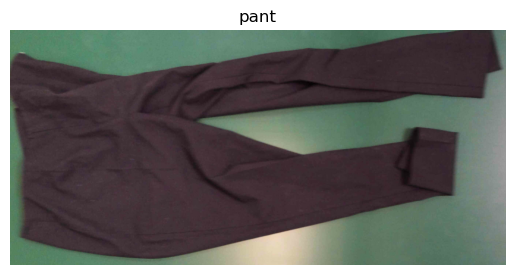

In [6]:
class_name = 'shirt'
relative_path = get_training_data_path('classifier', class_name)
print(relative_path)


fullpath = os.path.join(relative_path, 'frame_241_skirt__.jpg')

for i in range(1, 10):

    #image = erase_generator(fullpath)

    image = Image.open(fullpath)

    clip_instance = ClipClassifier()

    clip_instance.image = image

    pred_class, prob = clip_instance.classifier()

    unique_id = str(uuid.uuid4())[:4]  # Extracting the first 4 characters of a UUID

    file_name = f"{class_name}-{unique_id}-{pred_class}"

    save_path = f"./clip_out/{file_name}"

    #name = img_path.split("/")[-1]
    #format_string = name.split(".")[0] + "_" + unique_id
    # Display the image and the colored segmentation maps
    plt.imshow(image)
    plt.axis('off')
    plt.title(pred_class)
    plt.savefig(save_path)